In [4]:
'''----------------------------------------------IMPORT ------------------------------------------------------'''
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from PIL import Image

'''----------------------------------------------PLOT SETTINGS ------------------------------------------------------'''
plt.style.use('seaborn-colorblind') # Color Scheme for plots
plt.rcParams["font.family"] = "Times New Roman" # Font style
plt.rcParams.update({'font.size': 17}) #Set font size
'''----------------------------------------------SET DATA PATHS ---------------------------------------------------- '''

# data_path_butler = 'C:\\Users\\ruble\\Documents\\TemporaryUACData\\UAC_People_DashBoard_BCC Trailhead Data_Time series_butler.csv'
# data_path_griz = 'C:\\Users\\ruble\\Documents\\TemporaryUACData\\UAC_People_DashBoard_LCC Trailhead Data_Time series_Griz.csv'
# data_path_wp = 'C:\\Users\\ruble\\Documents\\TemporaryUACData\\UAC_People_DashBoard_LCC Trailhead Data_Time series_WhitePine.csv'

data_path_butler = 'D:\\GitHubData\\UAC_People_DashBoard_BCC Trailhead Data_Time series_butler.csv'
data_path_griz = 'D:\\GitHubData\\UAC_People_DashBoard_LCC Trailhead Data_Time series_Griz.csv'
data_path_wp = 'D:\\GitHubData\\UAC_People_DashBoard_LCC Trailhead Data_Time series_WhitePine.csv'

data_butler = pd.read_csv(data_path_butler)
data_griz = pd.read_csv(data_path_griz)
data_wp = pd.read_csv(data_path_wp)

In [5]:
data_butler['Converted Datetime'] = pd.DatetimeIndex(data_butler['Converted Datetime'])
data_butler = data_butler.set_index('Converted Datetime')


data_griz['Converted_Date'] = pd.DatetimeIndex(data_griz['Converted_Date'])
data_griz = data_griz.set_index('Converted_Date')


data_wp['Converted_datetime'] = pd.DatetimeIndex(data_wp['Converted_datetime'])
data_wp = data_wp.set_index('Converted_datetime')

In [6]:
dnight_butler = data_butler.between_time('0:00:00', '6:00:00')
dnight_griz = data_griz.between_time('0:00:00', '6:00:00')
dnight_wp = data_wp.between_time('0:00:00', '6:00:00')

In [7]:
#dnight = dnight.set_index('Converted_Date')
dmax_butler = dnight_butler.resample('D').max()
dmax_griz = dnight_griz.resample('D').max()
dmax_wp = dnight_wp.resample('D').max()

In [8]:
dtot_butler = data_butler.resample('D').sum()
dfinal_butler = dtot_butler - dmax_butler

dtot_griz= data_griz.resample('D').sum()
dfinal_griz = dtot_griz - dmax_griz

dtot_wp = data_wp.resample('D').sum()
dfinal_wp = dtot_wp - dmax_wp

In [9]:
# Analysis of the average people to beacons ratio
avg_ppl_butler = np.mean(dfinal_butler['People'])
avg_beacons_butler = np.mean(dfinal_butler['Beacons'])
avg_diff_butler = avg_ppl_butler - avg_beacons_butler

avg_ppl_griz = np.mean(dfinal_griz['People'])
avg_beacons_griz = np.mean(dfinal_griz['Beacons'])
avg_diff_griz = avg_ppl_griz - avg_beacons_griz

avg_ppl_wp = np.mean(dfinal_wp['People'])
avg_beacons_wp = np.mean(dfinal_wp['Beacons'])
avg_diff_wp = avg_ppl_wp - avg_beacons_wp

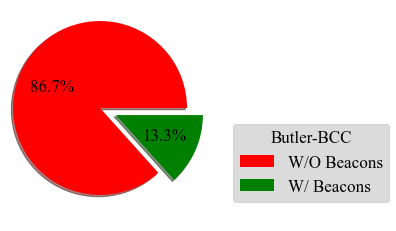

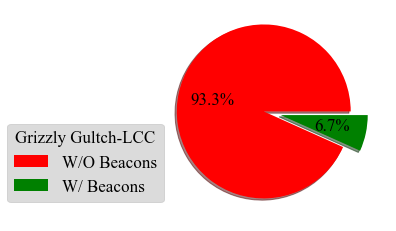

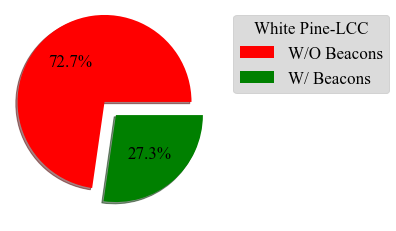

In [39]:
# Creation of Pie charts for plotting

butler_pie_array = np.array([avg_diff_butler/avg_ppl_butler, avg_beacons_butler/avg_ppl_butler])
griz_pie_array = np.array([avg_diff_griz/avg_ppl_griz, avg_beacons_griz/avg_ppl_griz])
wp_pie_array = np.array([avg_diff_wp/avg_ppl_wp, avg_beacons_wp/avg_ppl_wp])

chartColors = ['Red', 'Green']
chartLabels = ["W/O Beacons", "W/ Beacons"]
explodeRatio = [0.2, 0]

plt.pie(butler_pie_array, explode = explodeRatio, shadow = True, autopct='%1.1f%%', colors = chartColors)
plt.legend(title = "Butler-BCC", bbox_to_anchor=(1,0.5), labels = chartLabels, facecolor = 'lightgray')
plt.savefig("PieChartImages\\Butler_Pie.png", bbox_inches='tight');
plt.show()

plt.pie(griz_pie_array, explode = explodeRatio, shadow = True, autopct='%1.1f%%', colors = chartColors)
plt.legend(title = "Grizzly Gultch-LCC", bbox_to_anchor=(0,0.5), labels = chartLabels, facecolor = 'lightgray')
plt.savefig("PieChartImages\\Griz_Pie.png", bbox_inches='tight');
plt.show()

plt.pie(wp_pie_array, explode = explodeRatio, shadow = True, autopct='%1.1f%%', colors = chartColors)
plt.legend(title = "White Pine-LCC", bbox_to_anchor=(1,1), labels = chartLabels, facecolor = 'lightgray')
plt.savefig("PieChartImages\\WP_Pie.png", bbox_inches='tight');
plt.show()

In [40]:
# Removing white pixels from Pie charts
img = Image.open('PieChartImages\\WP_Pie.png')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("PieChartImages\\WP_Pie_2.png", "PNG")

img = Image.open('PieChartImages\\Butler_Pie.png')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("PieChartImages\\Butler_Pie_2.png", "PNG")

img = Image.open('PieChartImages\\Griz_Pie.png')
img = img.convert("RGBA")
datas = img.getdata()

newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)

img.putdata(newData)
img.save("PieChartImages\\Griz_Pie_2.png", "PNG")